# Ridge Algorithm

Ridge algorithm is very similar to lasso algorithm with the same goal. While lasso performs L1 regularization, ridge applies L2 regularization techniques in modeling the predictions. L1 regularization adds penalty to the variables equivalent to absolute value of the magnitude of the coefficients, where as L2 adds the penalty equivalent to square of the magnitude of the variable coefficients.

In [10]:
import os
import numpy as np 
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [11]:
print(os.getcwd())
print("")

train = pd.read_csv("../data/train_after_feature_engineering.csv")
test = pd.read_csv("../data/test_after_feature_engineering.csv")

print ('The train data has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))    
print ('The test data has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))


/home/mcheruvu/git/hid306/project/code

The train data has 1460 rows and 307 columns
The test data has 1459 rows and 306 columns


In [12]:
np.random.seed(1234)

#found this best alpha value through cross-validation
_best_alpha = 0.00099

_ridge_algo = Ridge(alpha = _best_alpha, normalize = True)

# Fit the Model

In [13]:
target_vector = pd.DataFrame(index = train.index, columns=["SalePrice"])
target_vector["SalePrice"] = train["SalePrice"]
target_vector["SalePrice"] = np.log1p(target_vector["SalePrice"]) # log(SalePrice) + 1

train.drop(['SalePrice'], axis=1, inplace=True)

_ridge_algo.fit(train, target_vector)   

Ridge(alpha=0.00099, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

# Feature Importance

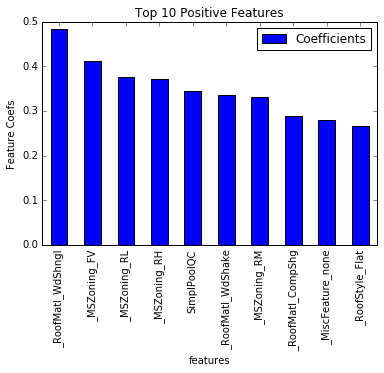

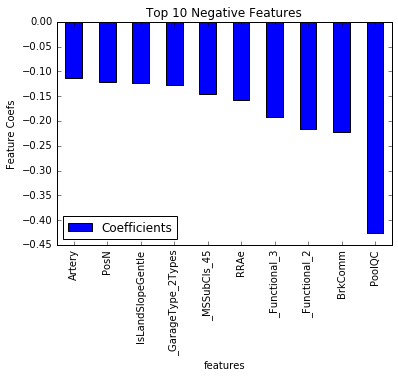

In [16]:
df = {'features': train.columns.values, 'Coefficients': _ridge_algo.coef_[0]}
coefficients = pd.DataFrame(df).sort_values(by='Coefficients', ascending=False)
plt.figure(figsize=(6,4))
coefficients.iloc[0:10].plot(x=['features'], kind='bar', title='Top 10 Positive Features',figsize=(6,4))
plt.ylabel('Feature Coefs')

plot = plt.gcf()
plot.savefig("../images/ridge_feature_ranking_pos.pdf", bbox_inches='tight')

plt.figure(figsize=(6,4))
coefficients.iloc[-10:].plot(x=['features'], kind='bar', title='Top 10 Negative Features',figsize=(6,4))
plt.ylabel('Feature Coefs')

plot = plt.gcf()
plot.savefig("../images/ridge_feature_ranking_neg.pdf", bbox_inches='tight')

# Predict the Test Sale Price

In [13]:
y_train = target_vector
y_train_pred = _ridge_algo.predict(train)
    
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))

print("Ridge score on training set: ", rmse_train)

y_test_pred = _ridge_algo.predict(test)

# some how the ridge prediction output is giving array of one dimensional array
y_test_pred = np.concatenate(y_test_pred, axis=0) 

print(y_test_pred[5:])

('Ridge score on training set: ', 0.098889538170551794)
[ 12.07863303  12.0633717   11.99841596 ...,  12.03874229  11.67402135
  12.36761731]


# Save Predictions

In [14]:
df_predict = pd.DataFrame({'Id': test["Id"], 'SalePrice': np.exp(y_test_pred) - 1.0})
#df_predict = pd.DataFrame({'Id': id_vector, 'SalePrice': sale_price_vector})

df_predict.to_csv('../data/kaggle_python_ridge.csv', header=True, index=False)

print("...file saved")

...file saved
